In [ ]:
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.data import Dataset
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tqdm.notebook import tqdm
import cv2 as cv
import os
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import audio_dataset_from_directory
dataset = "/kaggle/input/music-mood-classification/dataset"

In [3]:
import librosa

In [4]:
class_names = os.listdir(dataset)
class_names

['aggressive', 'sad', 'romantic', 'happy', 'dramatic']

In [5]:
SAMPLING_RATE = 22050
WAVE_SHAPE = (110250,)

In [6]:
max_length = 0
data = []
for item in os.listdir(dataset):
    print(f"{item}: ")
    for it in tqdm(os.listdir(os.path.join(dataset,item))):
        path = os.path.join(dataset,item,it)
        audio,sr = librosa.load(path)
        data.append(audio)

aggressive: 


  0%|          | 0/500 [00:00<?, ?it/s]

sad: 


  0%|          | 0/500 [00:00<?, ?it/s]

romantic: 


  0%|          | 0/500 [00:00<?, ?it/s]

happy: 


  0%|          | 0/500 [00:00<?, ?it/s]

dramatic: 


  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
data = np.array(data)

In [10]:
data.shape

(2500, 110250)

In [110]:
from tensorflow.keras.utils import to_categorical
Y = np.concatenate([[0]*500,[1]*500,[2]*500,[3]*500,[4]*500])
Y = to_categorical(Y)

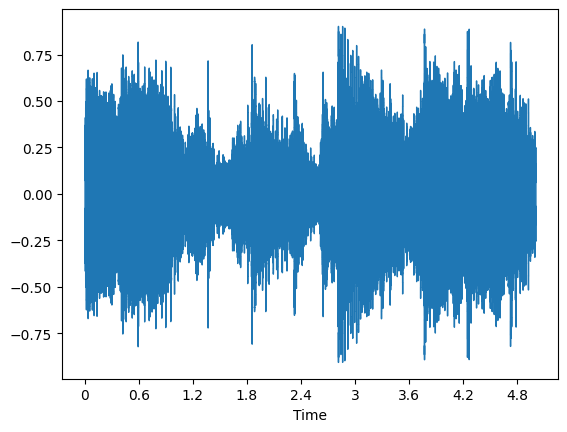

In [12]:
librosa.display.waveshow(data[10])

In [13]:
stft = librosa.stft(data)

In [14]:
stft.shape

(2500, 1025, 216)

/tmp/ipykernel_34/1545479683.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft[1500])


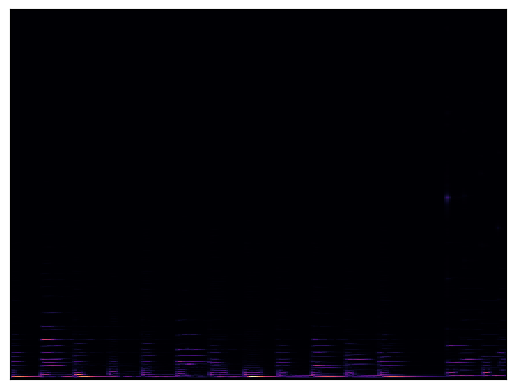

In [15]:
librosa.display.specshow(stft[1500])

In [16]:
stft = np.abs(stft)

In [53]:
stft = np.expand_dims(stft,axis=3)

In [54]:
stft.shape

(2500, 1025, 216, 1)

In [ ]:
mfcc = []
for item in tqdm(data):
    mfcc.append(librosa.feature.mfcc(y=item,n_mfcc=128))
mfcc = np.array(mfcc)
mfcc.shape

In [72]:
mfcc = np.expand_dims(mfcc,axis=3)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(stft,y,test_size=0.2)

In [20]:
y_test.shape

(500, 5)

# CNN Model

In [66]:
model = Sequential([
    Input(shape=(1025,216,1)),
    Conv2D(16,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(32,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(64,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),  
    
    Flatten(),

    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(5,activation="softmax")
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 1021, 212, 16)  │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 510, 106, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 510, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 506, 102, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 253, 51, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 253, 51, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 249, 47, 64)    │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 124, 23, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 124, 23, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 182528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │    23,363,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,437,253 (89.41 MB)

 Trainable params: 23,437,029 (89.41 MB)

 Non-trainable params: 224 (896.00 B)

In [67]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [68]:
hist = model.fit(X_train,y_train,epochs=15)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.3916 - loss: 10.8798
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7033 - loss: 0.8946
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8081 - loss: 0.5457
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.9265 - loss: 0.2570
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8759 - loss: 0.3569
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9187 - loss: 0.3157
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8666 - loss: 0.4610
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9054 - loss: 0.3616
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9405 - loss: 0.1939
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9564 - loss: 0.1752
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9673 - loss: 0.1201
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/s

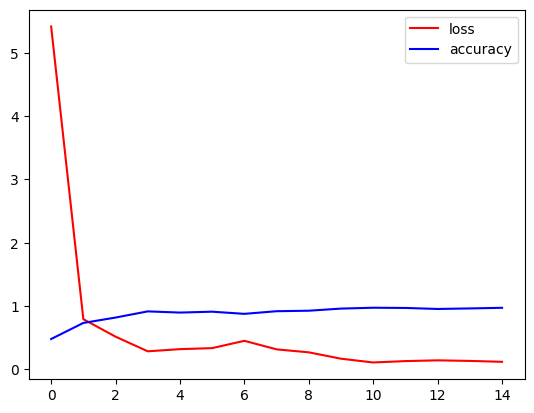

In [69]:
plt.plot(hist.history["loss"],label="loss",color="red")
plt.plot(hist.history["accuracy"],label="accuracy",color="blue")
plt.legend()
plt.show()

In [70]:
pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step


In [71]:
p = []
for item in pred:
    p.append(np.argmax(item))
p = np.array(p)

In [72]:
p.shape

(500,)

In [73]:
true = []
for item in y_test:
    true.append(np.argmax(item))
true = np.array(true)

In [74]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true,p)

<Axes: >

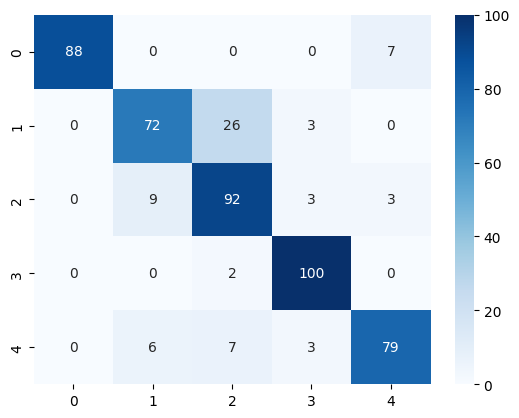

In [75]:
import seaborn as sns

sns.heatmap(cm,cmap="Blues",annot=True,fmt=".0f")

In [76]:
from sklearn.metrics import classification_report

print(classification_report(true,p))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        95
           1       0.83      0.71      0.77       101
           2       0.72      0.86      0.79       107
           3       0.92      0.98      0.95       102
           4       0.89      0.83      0.86        95

    accuracy                           0.86       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



# CNN - RNN Model

In [92]:
lstm_model = Sequential([
    Input(shape=(1025,216,1)),
    
    Conv2D(16,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(32,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(64,(5,5),activation="relu"),
    MaxPooling2D((2,2)),
    BatchNormalization(),  
    
    Reshape((124,-1)),
    
    LSTM(128,return_sequences=True,activation="tanh"),
    
    LSTM(256,return_sequences=True,activation="tanh"),

    LSTM(512),
    
    Dense(128,activation="relu"),
    Dense(5,activation="softmax")
])
lstm_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 1021, 212, 16)  │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 510, 106, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 510, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 506, 102, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 253, 51, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 253, 51, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 249, 47, 64)    │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 124, 23, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 124, 23, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 124, 1472)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 124, 128)       │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 124, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,920,133 (11.14 MB)

 Trainable params: 2,919,909 (11.14 MB)

 Non-trainable params: 224 (896.00 B)

In [93]:
lstm_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [95]:
lstm_model.fit(X_train,y_train,epochs=30)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.8473 - loss: 0.3817
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.8395 - loss: 0.4283
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.8714 - loss: 0.3356
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.8932 - loss: 0.2964
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9197 - loss: 0.2279
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.9248 - loss: 0.2121
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.9155 - loss: 0.2300
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9224 - loss: 0.1843
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9168 - loss: 0.2413
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.9432 - loss: 0.1512


In [96]:
pred = lstm_model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 197ms/step


In [97]:
p = []
for item in pred:
    p.append(np.argmax(item))
p = np.array(p)

<Axes: >

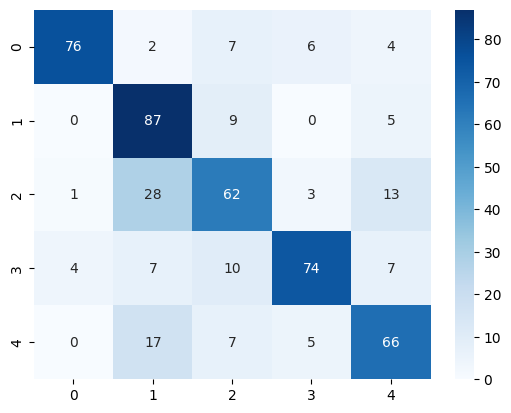

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true,p)
sns.heatmap(cm,cmap="Blues",annot=True,fmt=".0f")

In [99]:
from sklearn.metrics import classification_report

print(classification_report(true,p))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        95
           1       0.62      0.86      0.72       101
           2       0.65      0.58      0.61       107
           3       0.84      0.73      0.78       102
           4       0.69      0.69      0.69        95

    accuracy                           0.73       500
   macro avg       0.75      0.73      0.73       500
weighted avg       0.75      0.73      0.73       500



# Two Stream Model

In [112]:
dd = []
for i in tqdm(range(2500)):
    dd.append((stft[i],mfcc[i],Y[i]))

  0%|          | 0/2500 [00:00<?, ?it/s]

In [114]:
random.shuffle(dd)

In [115]:
train,test = dd[:2000],dd[2000:]

In [117]:
len(test)

500

In [118]:
X1_train = []
X2_train = []
y_train = []
for item in train:
    X1_train.append(item[0])
    X2_train.append(item[1])
    y_train.append(item[2])
    
X1_train = np.array(X1_train)
X2_train = np.array(X2_train)
y_train = np.array(y_train)

In [121]:
X1_test = []
X2_test = []
y_test = []
for item in test:
    X1_test.append(item[0])
    X2_test.append(item[1])
    y_test.append(item[2])
    
X1_test = np.array(X1_test)
X2_test = np.array(X2_test)
y_test = np.array(y_test)

In [122]:
inp1 = Input(shape=(1025, 216, 1))
x = Conv2D(16,(4,1),activation="relu")(inp1)
x = MaxPooling2D((2,1))(x)
x = BatchNormalization()(x)

x = Conv2D(32,(4,1),activation="relu")(x)
x = MaxPooling2D((2,1))(x)
x = BatchNormalization()(x)

x = Conv2D(64,(4,1),activation="relu")(x)
x = MaxPooling2D((2,1))(x)
x = BatchNormalization()(x)

inp2 = Input(shape=(128,216,1))
y = Conv2D(64,(4,1), activation="relu")(inp2)
y = BatchNormalization()(y)

z = Add()([x,y])
z = Reshape((125,-1))(z)
z = LSTM(256,return_sequences=True,activation="tanh")(z)
z = LSTM(128,return_sequences=True,activation="tanh")(z)
z = LSTM(64,activation="tanh")(z)
z = Dense(32,activation="relu")(z)
z = Dense(5,activation="softmax")(z)

two_stream_model = Model(inputs=[inp1,inp2],outputs=[z])

two_stream_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42      │ (None, 1025, 216, │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 1022, 216, │         80 │ input_layer_42[0… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_68    │ (None, 511, 216,  │          0 │ conv2d_82[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 511, 216,  │         64 │ max_pooling2d_68… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 508, 216,  │      2,080 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_69    │ (None, 254, 216,  │          0 │ conv2d_83[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 254, 216,  │        128 │ max_pooling2d_69… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 251, 216,  │      8,256 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_43      │ (None, 128, 216,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_70    │ (None, 125, 216,  │          0 │ conv2d_84[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 125, 216,  │        320 │ input_layer_43[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 216,  │        256 │ max_pooling2d_70… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 216,  │        256 │ conv2d_85[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 125, 216,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 125,       │          0 │ add_7[0][0]       │
│                     │ 13824)            │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 125, 256)  │ 14,418,944 │ reshape_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 125, 128)  │    197,120 │ lstm_11[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 14,679,157 (56.00 MB)

 Trainable params: 14,678,805 (56.00 MB)

 Non-trainable params: 352 (1.38 KB)

In [123]:
two_stream_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [124]:
hist = two_stream_model.fit((X1_train,X2_train),y_train,epochs=30)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 531ms/step - accuracy: 0.2943 - loss: 1.5255
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - accuracy: 0.4122 - loss: 1.2833
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 484ms/step - accuracy: 0.4546 - loss: 1.2169
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 484ms/step - accuracy: 0.4906 - loss: 1.1955
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.5177 - loss: 1.1256
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.4953 - loss: 1.1748
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.5291 - loss: 1.0836
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.5899 - loss: 0.9863
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.5805 - loss: 1.0449
Epoch 10/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.6607 - loss: 0.8756
Epoch 11/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.5964 - loss: 0.9600
Epoch 12/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 30

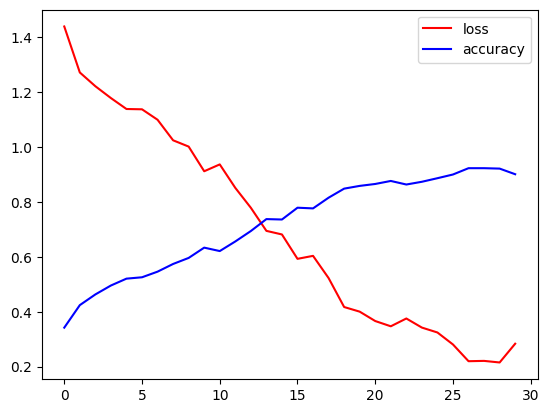

In [125]:
plt.plot(hist.history["loss"],label="loss",color="red")
plt.plot(hist.history["accuracy"],label="accuracy",color="blue")
plt.legend()
plt.show()

In [126]:
pred = two_stream_model.predict((X1_test,X2_test))

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step


In [127]:
p = []
for item in pred:
    p.append(np.argmax(item))
p = np.array(p)

In [128]:
true = []
for item in y_test:
    true.append(np.argmax(item))
true = np.array(true)

<Axes: >

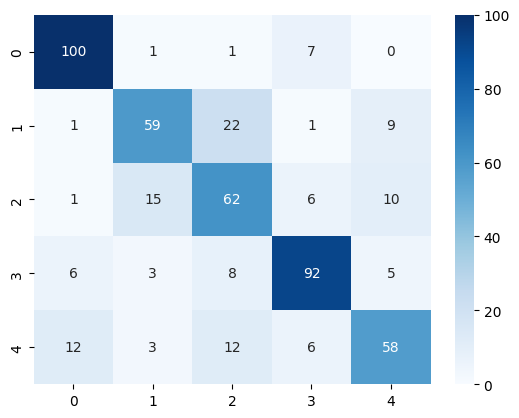

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(true,p)
sns.heatmap(cm,cmap="Blues",annot=True,fmt=".0f")

In [130]:
from sklearn.metrics import classification_report

print(classification_report(true,p))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       109
           1       0.73      0.64      0.68        92
           2       0.59      0.66      0.62        94
           3       0.82      0.81      0.81       114
           4       0.71      0.64      0.67        91

    accuracy                           0.74       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.74      0.74      0.74       500

